In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(n_samples=100):
    X = 2 * np.random.rand(n_samples, 1)  # Features
    y = 4 + 3 * X + np.random.randn(n_samples, 1)  # Target with noise
    return X, y

X, y = generate_data()
# print(X,y)

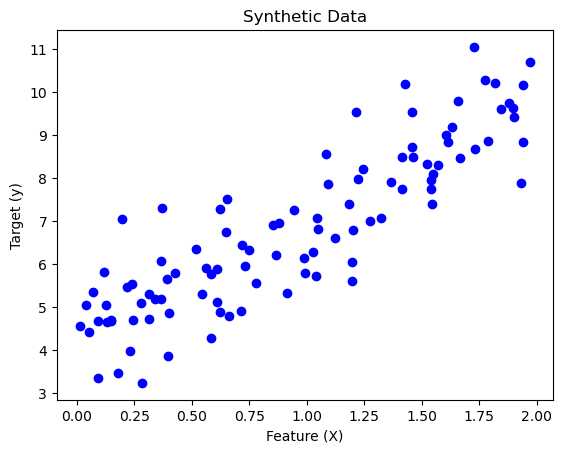

In [11]:
# Visualize the data
plt.scatter(X, y, color='blue', marker='o')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Synthetic Data')
plt.show()

In [15]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [29]:
# Prepare data for gradient descent
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1 to each instance (bias term)
theta_initial = np.random.randn(2, 1)  # Random initialization of theta
learning_rate = 0.1
num_iterations = 1000

# Perform gradient descent
theta_optimal, cost_history = gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations)

print(f"Optimal parameters: {theta_optimal.ravel()}")


Optimal parameters: [4.21509615 2.77011339]


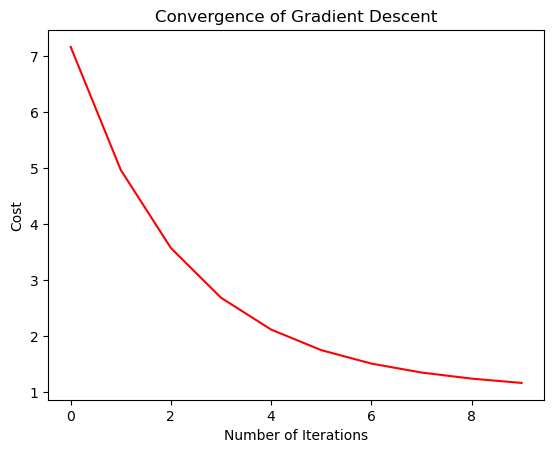

In [25]:
# Visualize cost function convergence
plt.plot(range(num_iterations), cost_history, color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.show()


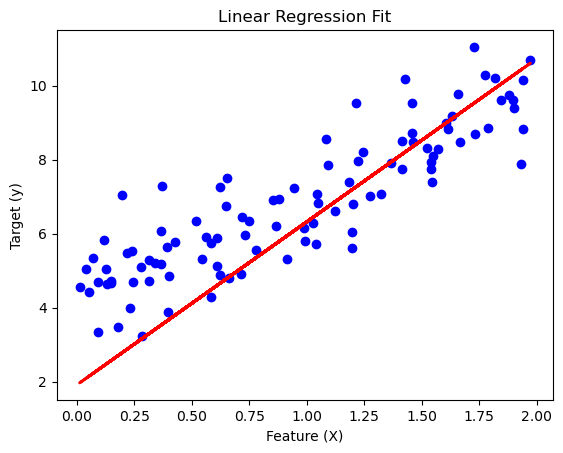

In [27]:
# Plot the regression line
plt.scatter(X, y, color='blue', marker='o')
plt.plot(X, X_b.dot(theta_optimal), color='red', linewidth=2)
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression Fit')
plt.show()